In [33]:
import cv2
import matplotlib.pyplot as plt
import os
import json
import cv2
import numpy as np
import mediapipe as mp
import skimage
from skimage.io import imsave, imread
from skimage.transform import PiecewiseAffineTransform, warp

In [34]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

In [35]:
face_contour=[10,338,297,332,284,251,389,356,454,323,361,288,397,265,379,378,400,377,152,148,176,149,150,136,172,58,132,93,234,127,162,21,54,103,67,109]

# for i in mp_face_mesh.FACEMESH_CONTOURS:
#     #face_contour.append(i[0])
#     #face_contour.append(i[1])
#     continue
# print(face_contour)
# print(len(face_contour))

In [36]:
face1=cv2.imread('face1.png') #face from
face2=cv2.imread('face3.jpg') #face to
face2=cv2.resize(face2,(face1.shape[1],face1.shape[0]))


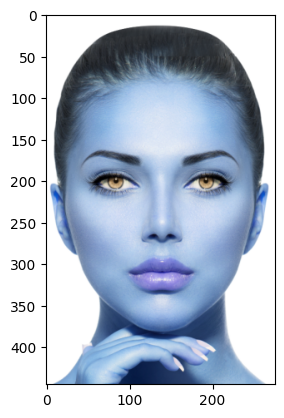

In [37]:
plt.imshow(face1)


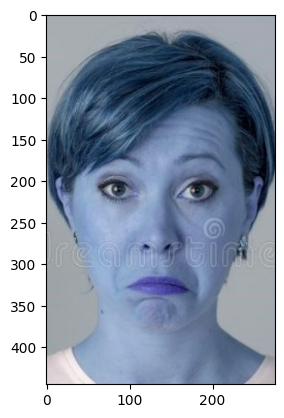

In [38]:
plt.imshow(face2)

In [39]:
def get_keypoints(image):
    drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=1)
    with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:
        # Convert the BGR image to RGB before processing.
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        H,W,_ = image.shape
        annotated_image = image.copy()
        #print( results.multi_face_landmarks[0])
        for face_landmarks in results.multi_face_landmarks:

          mp_drawing.draw_landmarks(
              image=annotated_image,
              landmark_list=face_landmarks,
              connections=mp_face_mesh.FACEMESH_TESSELATION,
              landmark_drawing_spec=None,
              connection_drawing_spec=mp_drawing_styles
              .get_default_face_mesh_tesselation_style())

        img2=cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR)
        face_landmarks = results.multi_face_landmarks[0]
        keypoints = np.array([(W*point.x,H*point.y) for point in face_landmarks.landmark[0:468]])

        #print(keypoints)
        #xi=[i[0] for i in keypoints]
        #yi=[i[1] for i in keypoints]
        #plt.scatter(xi, yi, c ="blue",s=1)
        #plt.imshow(img2)
        return keypoints


In [40]:
kp1=get_keypoints(face1)
kp2=get_keypoints(face2)
print("kp1",kp1)
print("kp2",kp2)

kp1 [[138.31840008 294.62925583]
 [137.36727163 267.48163462]
 [137.26686686 276.8644172 ]
 [129.17523086 233.53724778]
 [137.43504956 257.16862649]
 [137.43664771 243.41931939]
 [137.37746701 209.73606199]
 [ 66.61982238 206.0331431 ]
 [137.32050732 183.77690464]
 [137.367706   169.6640189 ]
 [137.8034845  116.43886343]
 [138.44302297 300.05775094]
 [138.51499707 306.08691007]
 [138.56371194 310.27405232]
 [138.58129978 310.81283569]
 [138.74665499 317.33900279]
 [138.82108778 325.27078629]
 [138.8964057  333.27500701]
 [137.91243732 343.12875092]
 [137.34874129 272.45866358]
 [129.32483405 272.0112291 ]
 [ 26.76294819 164.20541897]
 [ 94.95304674 215.37647113]
 [ 84.83530954 216.32422909]
 [ 75.22566915 215.9409298 ]
 [ 62.5016205  209.84868318]
 [103.83228362 213.22893679]
 [ 80.15688658 184.35648203]
 [ 92.0009695  185.9571299 ]
 [ 69.35135499 186.19046211]
 [ 62.45485619 190.56754321]
 [ 54.02060151 216.59025222]
 [103.11843529 355.65850794]
 [ 63.00248057 202.98274279]
 [ 24.7438

C:\Users\debma\AppData\Local\Temp\ipykernel_19236\1010688475.py:5: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(kp2,kp1)


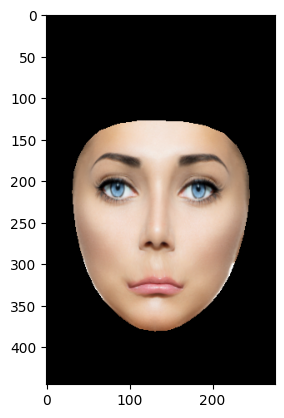

In [41]:
H_new,W_new,_ = face1.shape
face1=cv2.cvtColor(face1, cv2.COLOR_RGB2BGR)
face2=cv2.cvtColor(face2, cv2.COLOR_RGB2BGR)
tform = PiecewiseAffineTransform()
tform.estimate(kp2,kp1)
texture = warp(face1, tform, output_shape=(H_new,W_new))
texture = (255*texture).astype(np.uint8)
plt.imshow(texture)

In [42]:
kp3=get_keypoints(texture)
# print(kp3)

In [43]:
contour3=np.array([kp3[i] for i in face_contour])
contour1=np.array([kp1[i] for i in face_contour])
print(contour3.shape)
print(contour1.shape)
# print(contour3==contour2)

(36, 2)
(36, 2)


C:\Users\debma\AppData\Local\Temp\ipykernel_19236\1895664227.py:5: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(contour1,contour3)


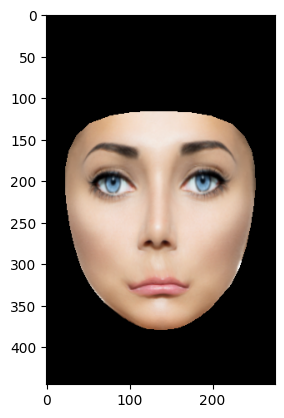

In [44]:
H_new,W_new,_ = face1.shape
face1=cv2.cvtColor(face1, cv2.COLOR_RGB2BGR)
face2=cv2.cvtColor(face2, cv2.COLOR_RGB2BGR)
tform = PiecewiseAffineTransform()
tform.estimate(contour1,contour3)
texture = warp(texture, tform, output_shape=(H_new,W_new))
texture = (255*texture).astype(np.uint8)
plt.imshow(texture)
#print(texture)

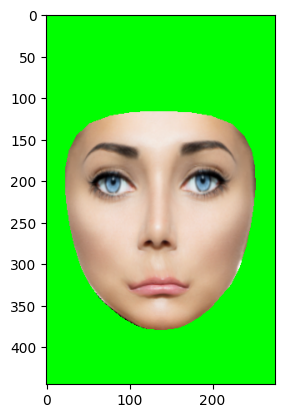

In [45]:
mask = np.zeros((H_new+2, W_new+2), np.uint8)
uppermask=texture.copy()
cv2.floodFill(texture, mask, (0,0),(0,255,0));
plt.imshow(texture)
#print(texture)

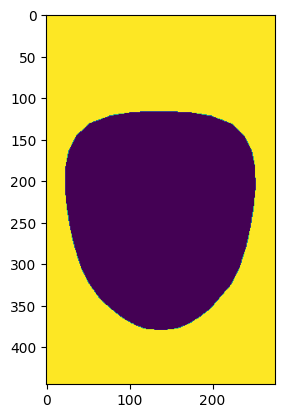

In [46]:
lower_green=np.array([0, 200, 0])    
upper_green=np.array([0, 255, 100])    
mask = cv2.inRange(texture, lower_green, upper_green)
plt.imshow(mask)

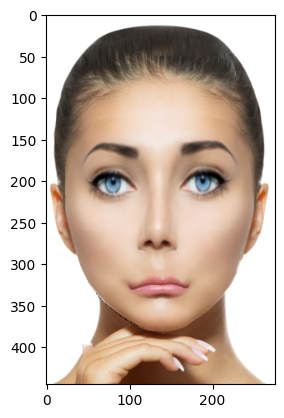

In [47]:
face1=cv2.cvtColor(face1, cv2.COLOR_RGB2BGR)
face1[mask == 0] = [0, 0, 0]
newface=face1+uppermask
plt.imshow(newface)

In [48]:
imsave("newface.jpg",newface)